In [1]:
import glob
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import xclim as xc
import cftime
import seaborn as sns

## CORDEX

In [10]:
def read_data(var):
    hist_files = sorted(glob.glob(f'/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/historical/r4i1p1f1/BARPA-R/v1-r1/day/{var}/latest/{var}_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_day_*.nc'))
    ssp370_files = sorted(glob.glob(f'/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/ssp370/r4i1p1f1/BARPA-R/v1-r1/day/{var}/latest/{var}_AUS-15_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_day_*.nc'))
    cordex_files = hist_files + ssp370_files
    ds_cordex = xr.open_mfdataset(cordex_files)
    ds_cordex = ds_cordex.sel({'lat': -34.92, 'lon': 138.62}, method='nearest')
    ds_cordex = ds_cordex.compute()

    return ds_cordex

In [11]:
ds_pr = read_data('pr')

In [12]:
ds_pr

<xarray.Dataset> Size: 2MB
Dimensions:    (time: 51500, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 412kB 1960-01-01T12:00:00 ... 2100-12-31...
    lat        float64 8B -34.88
    lon        float64 8B 138.6
Dimensions without coordinates: bnds
Data variables:
    pr         (time) float64 412kB 1.602e-07 9.835e-07 ... 0.0004385 2.757e-07
    time_bnds  (time, bnds) datetime64[ns] 824kB 1960-01-01 ... 2101-01-01
    crs        (time) int32 206kB -2147483647 -2147483647 ... -2147483647
Attributes: (12/61)
    axiom_version:             0.1.0
    axiom_schemas_version:     0.1.0
    axiom_schema:              cordex-1D.json
    Conventions:               CF-1.11, ACDD-1.3
    activity_id:               DD
    title:                     Bureau of Meteorology Atmospheric Regional Pro...
    ...                        ...
    geospatial_lat_max:        13.632
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        88.0355
    geospatial_lon_max:        207.9275
    geospatial_lon_units:      degrees_east
    history:                   Thu Jun 20 09:51:30 2024: /g/data/access/ngm/m...

In [13]:
ds_evspsblpot = read_data('evspsblpot')

In [17]:
ds_evspsblpot['evspsblpot']

<xarray.DataArray 'evspsblpot' (time: 51500)> Size: 412kB
array([2.47187912e-04, 2.04168260e-04, 9.21115279e-05, ...,
       4.78621572e-04, 4.22358513e-04, 2.81069428e-04], shape=(51500,))
Coordinates:
  * time     (time) datetime64[ns] 412kB 1960-01-01T12:00:00 ... 2100-12-31T1...
    lat      float64 8B -34.88
    lon      float64 8B 138.6
Attributes:
    long_name:      Potential Evapotranspiration
    standard_name:  water_potential_evaporation_flux
    units:          kg m-2 s-1
    cell_methods:   time: mean (interval: 1 hour) time: mean (interval: 1D)
    grid_mapping:   crs

In [15]:
wb = ds_pr['pr'] - ds_evspsblpot['evspsblpot']

In [19]:
wb.attrs['units'] = ds_pr['pr'].attrs['units']

In [45]:
da_spei = xc.indices.standardized_precipitation_evapotranspiration_index(
    wb, freq='MS', window=12, cal_start='1950-01-01', cal_end='2014-12-31'
)   

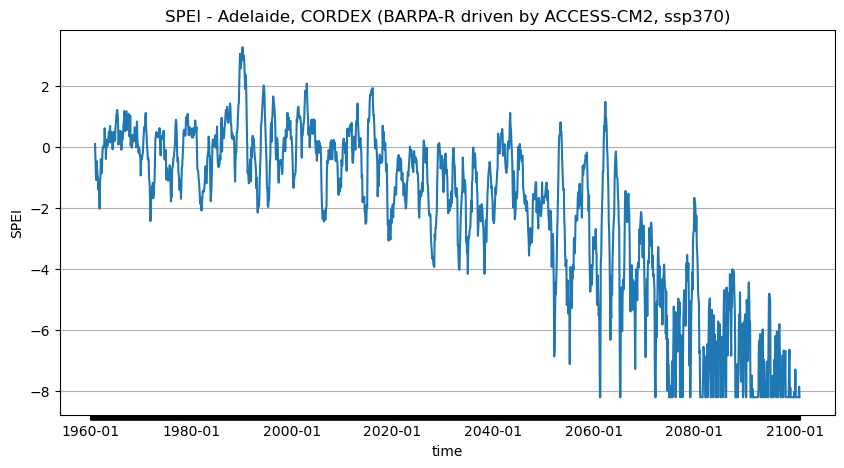

In [48]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_subplot()
ax.plot(da_spei.time.dt.strftime('%Y-%m').values, da_spei.values)
ax.set_ylabel('SPEI')
ax.set_xlabel('time')
ax.set_title('SPEI - Adelaide, CORDEX (BARPA-R driven by ACCESS-CM2, ssp370)')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 240) != 0:
        t.set_visible(False)
plt.show()